In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential, Model
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import urllib
import csv



IMG_HEIGHT=48
IMG_WIDTH=48


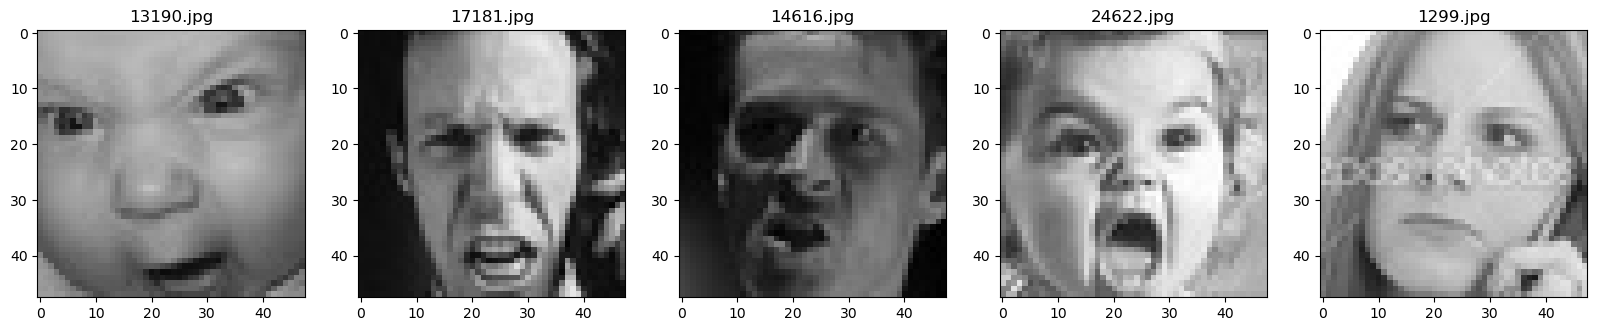

In [4]:
import random


plt.figure(figsize=(20,20))

hap_folder=r'E:\Face Base\Angry'
for i in range(5):
    file = random.choice(os.listdir(hap_folder))
    image_path= os.path.join(hap_folder, file)
    img=mpimg.imread(image_path)
    
    ax=plt.subplot(1,5,i+1)
    ax.set_title(file)
    plt.imshow(img)
    
    

In [5]:
def create_dataset(img_folder):
    image_array=[]
    name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1, file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image= image.astype('float32')
            image /= 255
            image_array.append(image)
            name.append(dir1)
            
    return (image_array, name)


(img_array, name) = create_dataset(r'E:\Face Base')


In [6]:
folder=r'E:\Face Base'


dictionary={k: v for v, k in enumerate(np.unique(name))}
dictionary 
{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprised': 5, 'Neutral': 6}

target_value= [dictionary[name[i]] for i in range (len(name))]



In [37]:
model=

model=tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=
        (IMG_HEIGHT, IMG_WIDTH, 3)), 
        tf.keras.layers.Conv2D(filters=32, kernel_size=3,
        strides=(2, 2), activation='relu'),
        tf.keras.layers.Conv2D(filters=64, kernel_size=3, 
        strides=(2, 2), activation='relu'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(7, activation='sigmoid')
    ]
)
train_set=img_array[:22000]
test_set= img_array[22000:]
train_value=target_value[:22000]
test_value=target_value[22000:]

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

#training the model
history = model.fit(x=np.array(train_set, np.float32), 
y=tf.cast(list(map(int, train_value)), np.float32), batch_size=32,  epochs=100, shuffle=True, 
validation_data=(np.array(test_set, np.float32), (np.array(test_value, np.float32))))

Epoch 1/100
688/688 [==============================] - 6s 8ms/step - loss: 1.3552 - accuracy: 0.4356 - val_loss: 6.7195 - val_accuracy: 0.0000e+00
Epoch 2/100
688/688 [==============================] - 6s 9ms/step - loss: 1.1858 - accuracy: 0.5327 - val_loss: 7.0403 - val_accuracy: 0.0000e+00
Epoch 3/100
688/688 [==============================] - 6s 9ms/step - loss: 1.0920 - accuracy: 0.5735 - val_loss: 8.0531 - val_accuracy: 0.0000e+00
Epoch 4/100
688/688 [==============================] - 6s 9ms/step - loss: 1.0230 - accuracy: 0.6085 - val_loss: 8.2000 - val_accuracy: 0.0000e+00
Epoch 5/100
688/688 [==============================] - 6s 9ms/step - loss: 0.9648 - accuracy: 0.6325 - val_loss: 8.3424 - val_accuracy: 0.0000e+00
Epoch 6/100
688/688 [==============================] - 7s 10ms/step - loss: 0.9105 - accuracy: 0.6552 - val_loss: 7.7958 - val_accuracy: 0.0000e+00
Epoch 7/100
688/688 [==============================] - 6s 9ms/step - loss: 0.8594 - accuracy: 0.6765 - val_loss: 8.44

KeyboardInterrupt: 

1/1 [==============================] - 0s 40ms/step
[[1.6688687e-15 7.0557230e-21 3.4742658e-17 2.9961501e-15 1.2045059e-15
  4.5174851e-19 6.9264667e-20]]


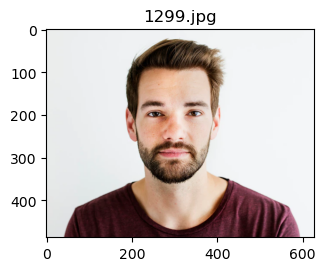

In [34]:
plt.figure(figsize=(20,20))

image_path=r'C:\Users\arwen\OneDrive\Desktop\portrait-white-man-isolated_53876-40306.webp'
image=mpimg.imread(image_path)
ax=plt.subplot(1,5,2)
ax.set_title(file)
plt.imshow(image)

image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
images_arr = []
images_arr.append(np.array(image))
img = np.asarray(images_arr)


img= img.astype('float32')
img /= 255

def find_emotion(prediction):
    emotion_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']
    highest_val=prediction.argmax()
    emotion=emotion_list[highest_val]
    return emotion


prediction=model.predict(img)
print(prediction)

#right now doesnt print values correctly

